In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [29]:
#loading the dataset into a pandas dataframe
df = pd.read_csv("AB_US_2020.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [30]:
#describing the dataset
df.shape

(226030, 17)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,226030.0,2.547176e+07,1.317814e+07,109.00000,1.515890e+07,2.590916e+07,3.772624e+07,4.556085e+07
host_id,226030.0,9.352385e+07,9.827422e+07,23.00000,1.399275e+07,5.138266e+07,1.497179e+08,3.679176e+08
latitude,226030.0,3.566283e+01,6.849855e+00,18.92099,3.276178e+01,3.726112e+01,4.072404e+01,4.773462e+01
longitude,226030.0,-1.032207e+02,2.622209e+01,-159.71490,-1.185981e+02,-9.781720e+01,-7.691932e+01,-7.099595e+01
price,226030.0,2.197165e+02,5.703536e+02,0.00000,7.500000e+01,1.210000e+02,2.010000e+02,2.499900e+04
minimum_nights,226030.0,4.525490e+02,2.103376e+05,1.00000,1.000000e+00,2.000000e+00,7.000000e+00,1.000000e+08
number_of_reviews,226030.0,3.450653e+01,6.360291e+01,0.00000,1.000000e+00,8.000000e+00,3.900000e+01,9.660000e+02
reviews_per_month,177428.0,1.431450e+00,1.683210e+00,0.01000,2.300000e-01,8.100000e-01,2.060000e+00,4.406000e+01
calculated_host_listings_count,226030.0,1.669856e+01,5.106897e+01,1.00000,1.000000e+00,2.000000e+00,6.000000e+00,5.930000e+02
availability_365,226030.0,1.593149e+02,1.401796e+02,0.00000,0.000000e+00,1.400000e+02,3.110000e+02,3.650000e+02


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

# EDA

In [33]:
#creating a series to identify columns with the dtype 'object'
obj = (df.dtypes == 'object')
#creating a list
object_cols = list(obj[obj].index)
print("Categorical Variables:", len(object_cols))

#creating a series to identify columns with the dtype 'int'
integer = (df.dtypes == 'int')
int_cols = list(integer[integer].index)
print("Integer Variables:", len(int_cols))

#creating a series to identify columns with the dtype 'float'
float_cols = list(df.dtypes[df.dtypes == 'float'].index)
print("Float Variables:", len(float_cols))

Categorical Variables: 7
Integer Variables: 0
Float Variables: 3


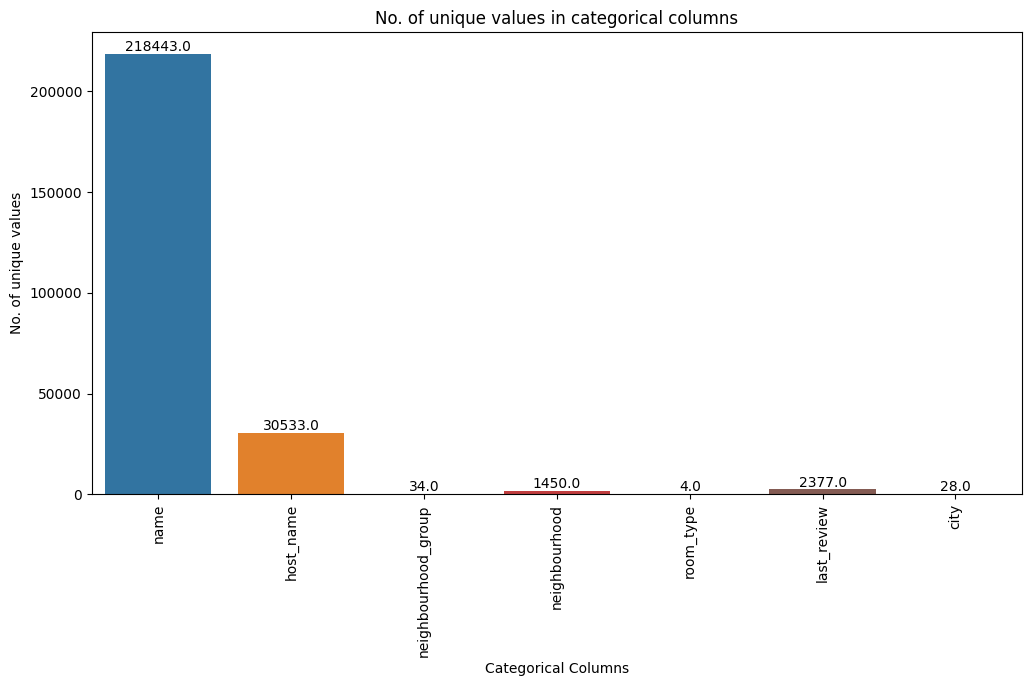

In [34]:
#analyzing categorical variables
unique_values = []
for col in object_cols:
    unique_values.append(df[col].nunique())

#plotting a barplot to show no. of unique values in categorical columns
plt.figure(figsize=(12,6))
ax = sns.barplot(x=object_cols, y=unique_values)

#annotating the barplot
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), bar.get_height(), ha='center', va='bottom')


plt.xticks(rotation=90)
plt.xlabel("Categorical Columns")
plt.ylabel("No. of unique values")
plt.title('No. of unique values in categorical columns')

#displaying the plot
plt.show()

In [35]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

In [36]:
#checking the number of unique values in each column
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].nunique()

unique_values

{'id': 226029,
 'name': 218443,
 'host_id': 130425,
 'host_name': 30533,
 'neighbourhood_group': 34,
 'neighbourhood': 1450,
 'latitude': 145091,
 'longitude': 145243,
 'room_type': 4,
 'price': 1975,
 'minimum_nights': 169,
 'number_of_reviews': 660,
 'last_review': 2377,
 'reviews_per_month': 1242,
 'calculated_host_listings_count': 142,
 'availability_365': 366,
 'city': 28}

In [37]:
#dropping irrelevant columns
df.drop(['id'], axis=1, inplace=True)
df.drop(['name'], axis=1, inplace=True)
df.drop(['host_name'], axis=1, inplace=True)

In [38]:
#checking to see if there are any null values
df.isnull().sum()

host_id                                0
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [43]:
correlation_matrix = df[['last_review', 'reviews_per_month']].corr()


ValueError: could not convert string to float: '16/02/20'